# **Principal Component Analysis (PCA)**

### Overview:
- Utilized a dataset with housing market data.
- Standardized key features and performed PCA, resulting in two principal components.
- Standardized the target variable 'price'.
- Split the dataset into training and testing sets.
- Trained four regression models: Linear Regression, Decision Tree, Random Forest, and K Neighbors.
- Evaluated models using RMSE and R-squared metrics.





In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tqdm.auto import tqdm

# Load the dataset
file_path = 'Real-estate-dataset.csv'
housing_df = pd.read_csv(file_path)

# Display the head of the dataframe
print(housing_df.head())

# Data Cleaning
# Remove rows based on specific conditions
#conditions = [
 #   (housing_df['bedrooms'] == 33) & (housing_df['bathrooms'] == 1.75),
  #  (housing_df['bedrooms'] == 0) & (housing_df['price'] == 1095000),
   # (housing_df['bedrooms'] == 0) & (housing_df['price'] == 380000),
    #(housing_df['bedrooms'] == 33) & (housing_df['area'] == 1620),
    #(housing_df['area'] > 1000000) & (housing_df['bathrooms'] == 1)
#]
#for condition in tqdm(conditions):
 #   housing_df = housing_df.drop(housing_df[condition].index)

# Split the data into train and test sets
train_df, test_df = train_test_split(housing_df, test_size=0.2, random_state=42)

# Display the head of the train and test dataframe
print('Train set:')
print(train_df.head())
print('\nTest set:')
print(test_df.head())

   price  No  X1 transaction date  X2 house age  \
0   37.9   1             2012.917          32.0   
1   42.2   2             2012.917          19.5   
2   47.3   3             2013.583          13.3   
3   54.8   4             2013.500          13.3   
4   43.1   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  
0     24.98298     121.54024  
1     24.98034     121.53951  
2     24.98746     121.54391  
3     24.98746     121.54391  
4     24.97937     121.54245  
Train set:
     price   No  X1 transac

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data 	X2 house age

features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
# Separating out the features
x = train_df.loc[:, features].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

# Performing PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
pca_data = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Display the head of the transformed data
print(pca_data.head())

# Display the explained variance ratio
print('Explained variance ratio:')
print(pca.explained_variance_ratio_)

   principal component 1  principal component 2
0              -1.075481              -2.046612
1               1.594229               0.473715
2               1.568072               1.438402
3              -1.285309              -1.418097
4              -0.895402               0.439215
Explained variance ratio:
[0.44085643 0.17101665]


Sum of explained variance ratio: 0.611873074664599


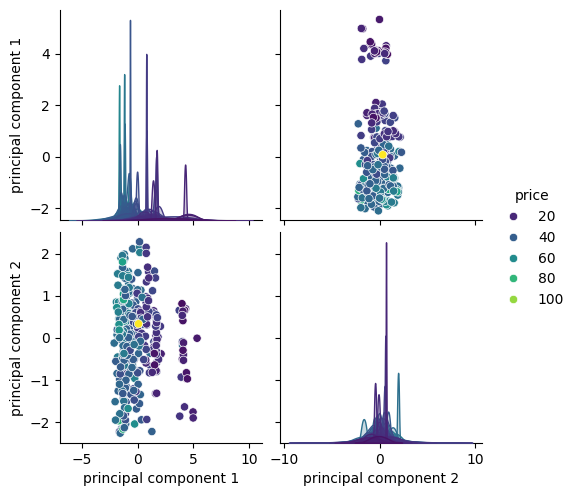

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sum of explained variance ratio
sum_explained_variance = np.sum(pca.explained_variance_ratio_)
print('Sum of explained variance ratio:', sum_explained_variance)

# Create a new dataframe with the principal components and target variable
# Note: Assuming 'price' is the target variable and is present in the train_df
pca_data['price'] = train_df['price'].values

# Plot pair plot
sns.pairplot(pca_data, vars=['principal component 1', 'principal component 2'], hue='price', palette='viridis')
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Standardize the target variable 'price'
sc2 = StandardScaler()
y_scaled = np.ravel(sc2.fit_transform(train_df[['price']].values.reshape(-1,1)))

# Display the standardized target variable
print(y_scaled[:5])

# Describe the PCA dataframe
pca_data_description = pca_data.describe()
print(pca_data_description)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(principalComponents, y_scaled, test_size=0.2, random_state=42)

# Train different regression models
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor()]

# Compute the RMSE and R-squared for each model
rmse_scores = []
r2_scores = []
for model in tqdm(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# Display the RMSE and R-squared scores
print('RMSE scores:', rmse_scores)
print('R-squared scores:', r2_scores)

[ 0.31415108 -1.05664993 -0.45874737 -0.00667469  0.17561268]
       principal component 1  principal component 2       price
count           3.310000e+02           3.310000e+02  331.000000
mean           -5.903301e-17           2.683318e-17   38.391541
std             1.628851e+00           1.014500e+00   13.735373
min            -2.111880e+00          -2.263804e+00    7.600000
25%            -1.232683e+00          -6.665033e-01   28.250000
50%            -5.122861e-01           3.581060e-02   39.300000
75%             7.735606e-01           6.648694e-01   46.600000
max             5.327185e+00           2.278662e+00  117.500000


  0%|          | 0/4 [00:00<?, ?it/s]

RMSE scores: [0.6063459711740324, 0.871527350376259, 0.6121198709134194, 0.6101194919039487]
R-squared scores: [0.5784334505100325, 0.12906209557930448, 0.5703665305521728, 0.5731699863023878]


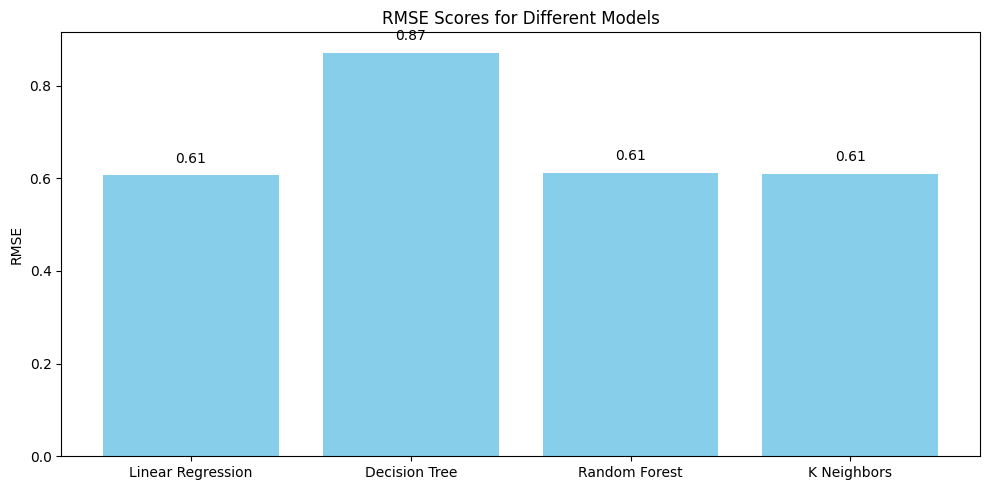

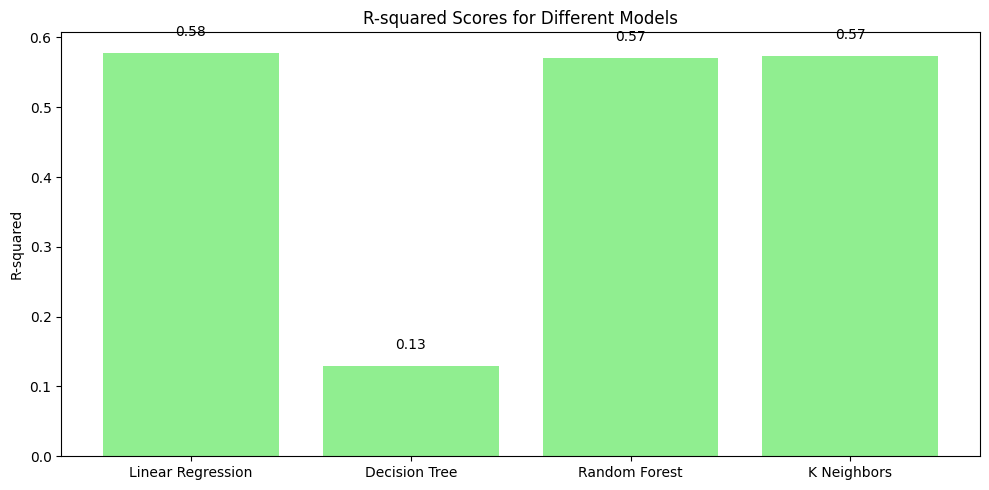

In [7]:
import matplotlib.pyplot as plt

# Model names
model_names = ['Linear Regression', 'Decision Tree', 'Random Forest', 'K Neighbors']

# Plotting RMSE scores
plt.figure(figsize=(10, 5))
plt.bar(model_names, rmse_scores, color='skyblue')
plt.title('RMSE Scores for Different Models')
plt.ylabel('RMSE')
for i, v in enumerate(rmse_scores):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()

# Plotting R-squared scores
plt.figure(figsize=(10, 5))
plt.bar(model_names, r2_scores, color='lightgreen')
plt.title('R-squared Scores for Different Models')
plt.ylabel('R-squared')
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, str(round(v, 2)), ha='center', va='bottom')
plt.tight_layout()
plt.show()


### Conclusion:
- Linear Regression model had the best performance with the lowest RMSE and highest R-squared score.
- Decision Tree model performed the worst with the highest RMSE and lowest R-squared score.
- Random Forest and K Neighbors models had similar and moderate performance metrics.

Linear Regression proved to be an effective model for predicting housing prices using principal components from the dataset. More complex models did not significantly improve prediction accuracy and might require further tuning or additional features to enhance their performance.

